# Multi-Layer Perceptrons / Dense Layers

In [1]:
# Setup
import tensorflow as tf
import keras

import numpy as np
import datetime

import os
import sys
import imp

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import models as M
import utils as U

imp.reload(M)
imp.reload(U)

/var/folders/b9/jjp98g8j2mbcn65j0fgl0dzw0000gp/T/ipykernel_24015/3341513761.py:10: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'utils' from '/Users/mghifary/Work/Code/AI/keras-poc/utils.py'>

### Constants

In [2]:
EPOCH = 30
BATCH = 128

DATADIR = "/Users/mghifary/Work/Code/AI/data"
MODELDIR = "/Users/mghifary/Work/Code/AI/models"

### Load and preprocess dataset

In [3]:
# Load dataset
data_path = os.path.join(DATADIR, "mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(data_path)
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Reshape
x_train = np.expand_dims(x_train, axis=-1) 
x_test = np.expand_dims(x_test, axis=-1)

(n_train, dx1, dx2, c) = x_train.shape
n_test = x_test.shape[0]

ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Shuffle and batch
ds_train = ds_train.shuffle(buffer_size=1024).batch(BATCH)
ds_test = ds_test.batch(BATCH)

### Visualize data

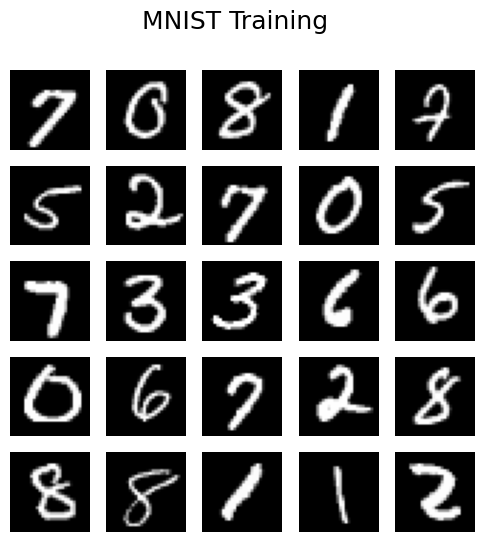

In [4]:
# Visualize training samples
U.visualize_dataset(ds_train, title="MNIST Training", n_samples=25)

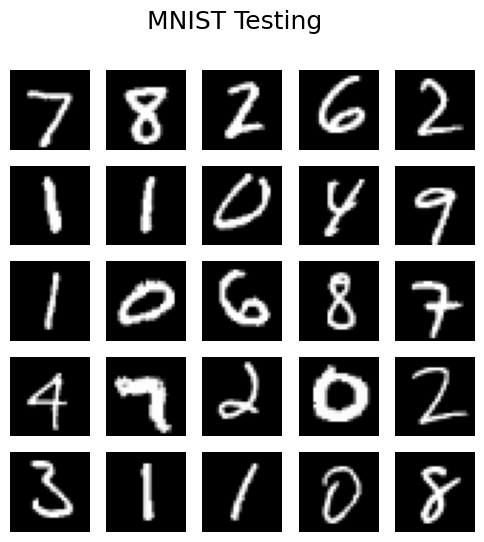

In [5]:
# Visualize test samples
U.visualize_dataset(ds_test, title="MNIST Testing", n_samples=25)

### Build NN model

In [6]:
# # Sequential model
# model = M.MLPSeq(num_classes=10)
# model.build(input_shape=(None, dx1, dx2, c))
# model.summary()

In [7]:
# Functional API
model = M.make_mlp(input_shape=(dx1, dx2, c), num_classes=10)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 784)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 256)               │    200,960 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 128)               │     32,896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 10)                │      1,290 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# # Subclassing API
# model = M.MLP(num_classes=10)
# model.build(input_shape=(None, dx1, dx2, c))
# model.summary()

#### Train model

In [9]:
# Loss and optimizer
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy = keras.metrics.SparseCategoricalAccuracy()
optimizer = keras.optimizers.Adam(learning_rate=3e-4)

In [10]:
# Define callback for Tensorboard and Model Checkpoint
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="./logs/mlp-mnist/" + current_time,
    update_freq="epoch"
)

checkpoint_dir = os.path.join(MODELDIR, f"mlp-mnist-{current_time}")

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# checkpoint_filepath = os.path.join(checkpoint_dir, "ckp.weights.h5")
checkpoint_filepath = os.path.join(checkpoint_dir, "model.keras")
modelcp_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    # save_weights_only=True
)

In [11]:
# # Store model configuration and architecture
# model_json = model.to_json()
# json_path = os.path.join(checkpoint_dir, "model.json")
# with open(json_path, "w") as json_file:
#     json_file.write(model_json)

In [12]:
# Compile and run training
model.compile(optimizer=optimizer, loss=loss_fn, metrics=[accuracy])
model.fit(ds_train, epochs=EPOCH, validation_data=ds_test, callbacks=[tensorboard_callback, modelcp_callback])

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8008 - sparse_categorical_accuracy: 0.7913 - val_loss: 0.1965 - val_sparse_categorical_accuracy: 0.9427
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1897 - sparse_categorical_accuracy: 0.9443 - val_loss: 0.1466 - val_sparse_categorical_accuracy: 0.9559
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1333 - sparse_categorical_accuracy: 0.9610 - val_loss: 0.1210 - val_sparse_categorical_accuracy: 0.9645
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1022 - sparse_categorical_accuracy: 0.9709 - val_loss: 0.1045 - val_sparse_categorical_accuracy: 0.9690
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0808 - sparse_categorical_accuracy: 0.9766 - val_loss: 0.0923 - val_sparse_categorical_accuracy: 0.9723
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0668 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.0898 - val_sparse_categorical_accuracy: 0.9723
Epoc